#### Estrutura educacional X Desempenho ENEM: [Kaggle](https://www.kaggle.com/andraguiar/estrutura-educacional-x-desempenho-enem)

A base escolhida é a de Censo demográfico e sinópses do ENEM, diponibilizadas nos sites dos órgãos competentes ([IBGE](http://www.dados.gov.br/dataset/cd-censo-demografico) e [INEP](http://portal.inep.gov.br/sinopses-estatisticas-da-educacao-basica)) para conulta pública. Os dados foram coletados entre 2010 e 2019 contendo a região geográfica, UF e dados estatísticos do Brasil e do exame nacional do ensino médio. Serão consideradas somente as informações estruturais educacionais e desempenho no ENEM para identificar possíveis correlações entre quantidade de escolas, docentes e matrículas, e desempenho no exame(ENEM). Tendo em vista que ainda não foram disponibilizados os dados de 2019, serão feitas algumas predições e definidos idicadores de acordo com a mediana utilizando regressores e classificadores supervisionados, juntamente com técnicas de mineração e pré-processamento de dados.

In [1]:
# Importa a classe Inscrição (Dados de Inscritos no ENEM/UF)
from view.view_inscricao import Inscricao
inscricao_uf = Inscricao('estadual')                                   # Instancia a Classe Inscrição
inscricao_uf.set_dataframe()                                           # Carrega o Dataframe com os dados originais e features calculadas

      ano Região Geográfica   Unidade da Federação  Área Territorial - km²  \
0    2010           Norte               Rondônia                237765.240   
1    2010           Norte                   Acre                164123.964   
2    2010           Norte               Amazonas               1559167.889   
3    2010           Norte                Roraima                223644.527   
4    2010           Norte                   Pará               1245870.798   
..    ...               ...                    ...                     ...   
265  2019             Sul      Rio Grande do Sul                281707.156   
266  2019    Centro-Oeste     Mato Grosso do Sul                357145.534   
267  2019    Centro-Oeste            Mato Grosso                903207.019   
268  2019    Centro-Oeste                  Goiás                340203.329   
269  2019    Centro-Oeste       Distrito Federal                  5760.783   

     Pop_estimada  Inc_ENEM  MAT_Edu_ Infantil  MAT_Ens_Fundame

J:\GIT_Repositorios\POS-Graduacao-Inteligecia_Artificial-Ciencia_de_Dados\projeto_3\ENEM\bckup1\model\estado.py:125: RuntimeWarning: divide by zero encountered in true_divide
  self.df.iloc[:,lst_tuples[0][1]].transpose().values)


In [ ]:
inscricao_uf.df.info()

In [2]:
inscricao_uf.df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ano                          270 non-null    int64  
 1   Região Geográfica            270 non-null    object 
 2   Unidade da Federação         270 non-null    object 
 3   Área Territorial - km²       270 non-null    float64
 4   Pop_estimada                 270 non-null    int32  
 5   Inc_ENEM                     270 non-null    float64
 6   MAT_Edu_ Infantil            270 non-null    int32  
 7   MAT_Ens_Fundamental          270 non-null    int32  
 8   MAT_Ens_ Médio               270 non-null    int32  
 9   MAT_Educ_Prof_Técnica_Médio  270 non-null    int32  
 10  MAT_Educ_Profissional(FIC)   270 non-null    int32  
 11  MAT_EJA                      270 non-null    int32  
 12  MAT_Educ_ Especial           270 non-null    int32  
 13  QTD_Edu_ Infantil   

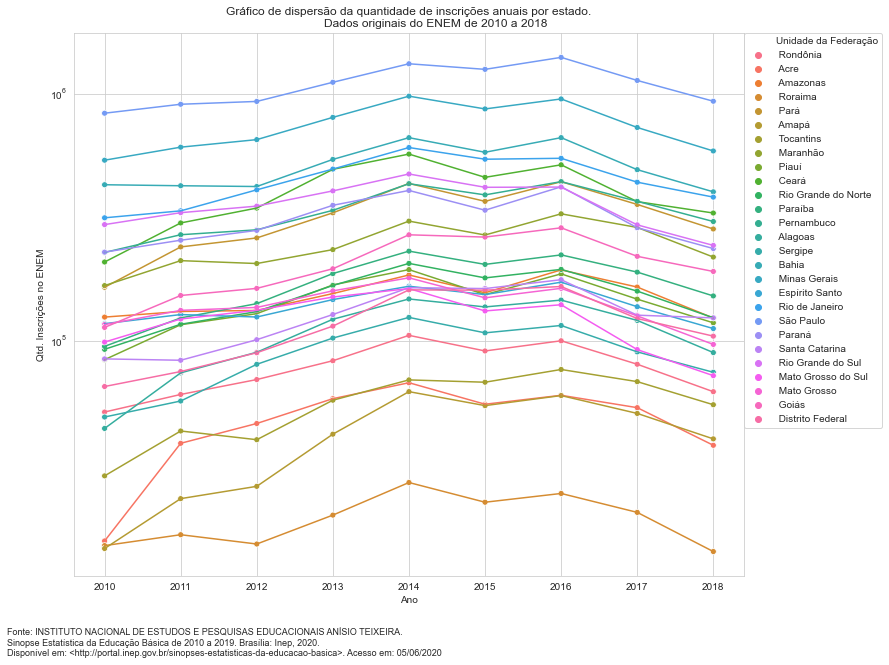

In [3]:
inscricao_uf.view_plot('inscricao', predicted=False)                     # Plota distribuição de Inscrições no ENEM por ANO(2010 a 2019)/UF

In [16]:
inscricao_uf.view_plot('estrutura', predicted=False) 

KeyError: "['MATRICULA/ESCOLA', 'POP/ESCOLA', 'POP/INSC_ENEM', 'DOCENTE/ESCOLA', 'MATRICULA/DOCENTE'] not in index"

<Figure size 1440x4320 with 0 Axes>

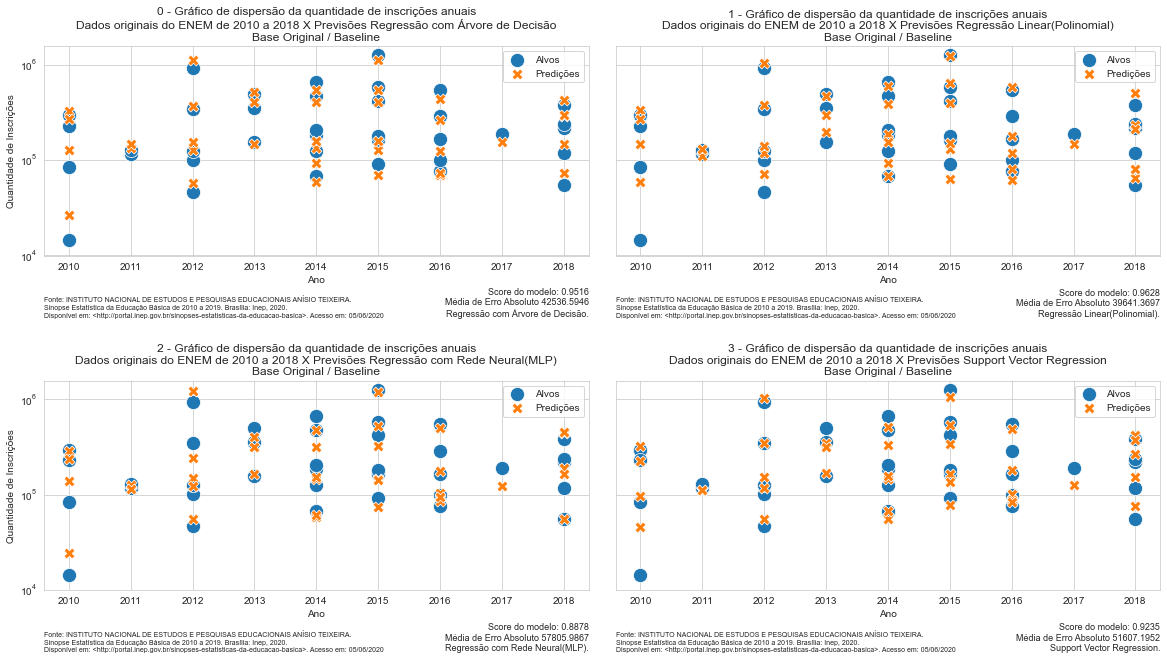

In [4]:
inscricao_uf.set_metrics(base=True, balanced=False, scaled=False)       # BaseLine

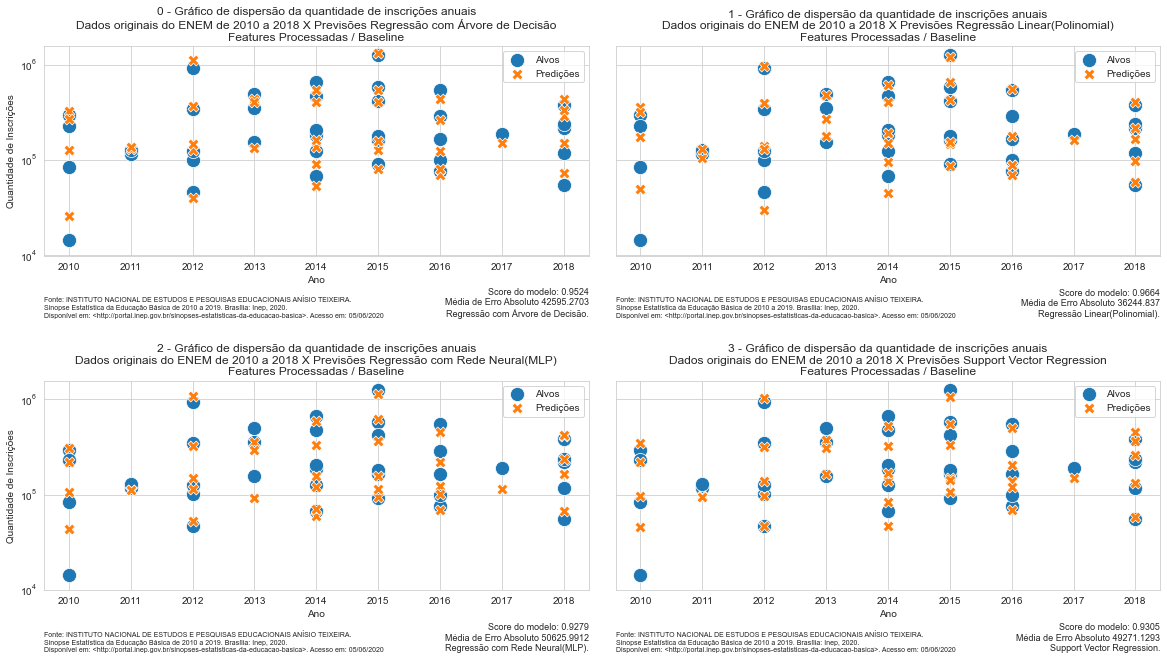

In [5]:
inscricao_uf.set_metrics(base=True, balanced=True, scaled=False)       # BaseLine / balanced data

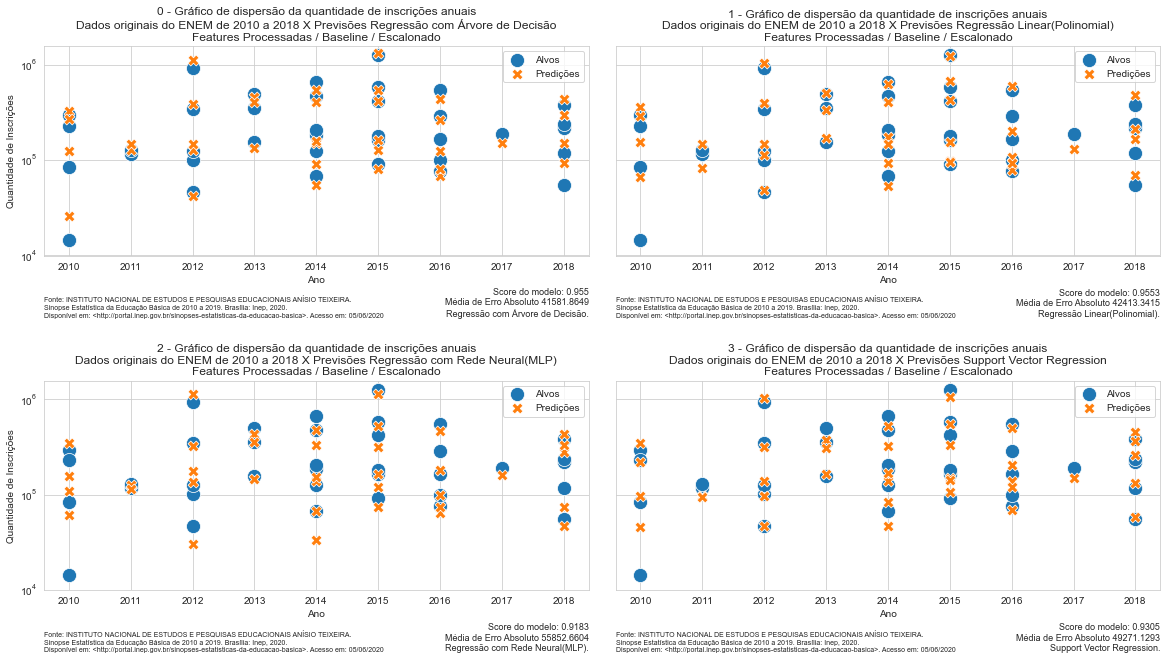

In [6]:
inscricao_uf.set_metrics(base=True, balanced=True, scaled=True)       # baseline / balanced data / scaled data

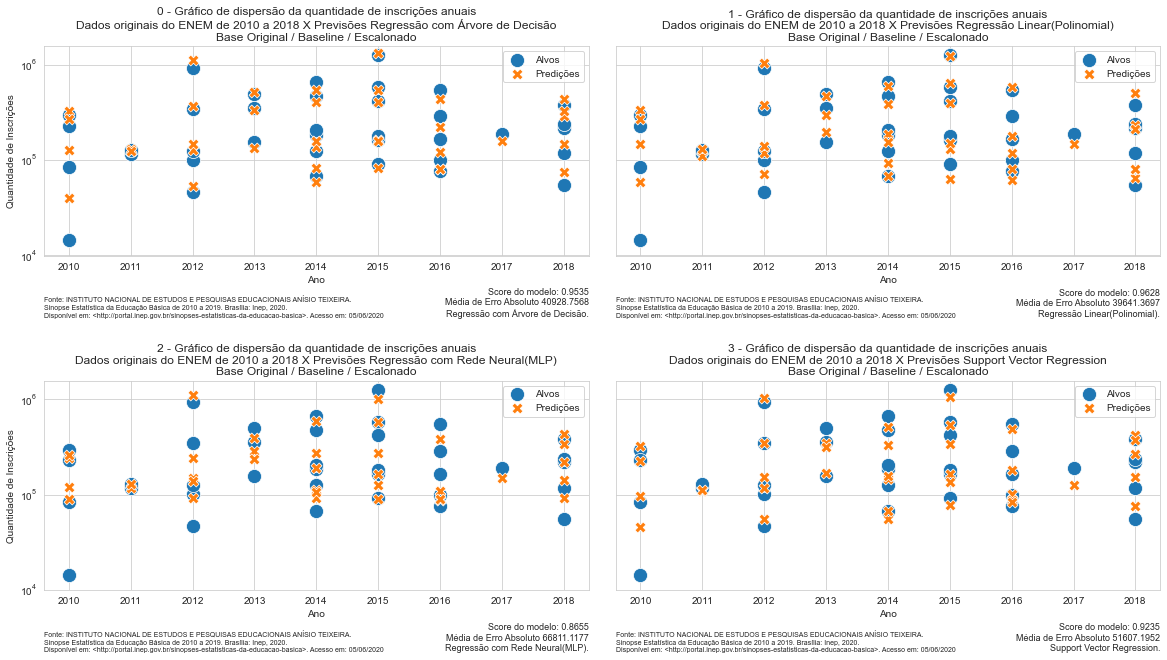

In [7]:
inscricao_uf.set_metrics(base=True, balanced=False, scaled=True)       # baseline / scaled data

C:\Users\TOP Artes\.conda\envs\proj\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


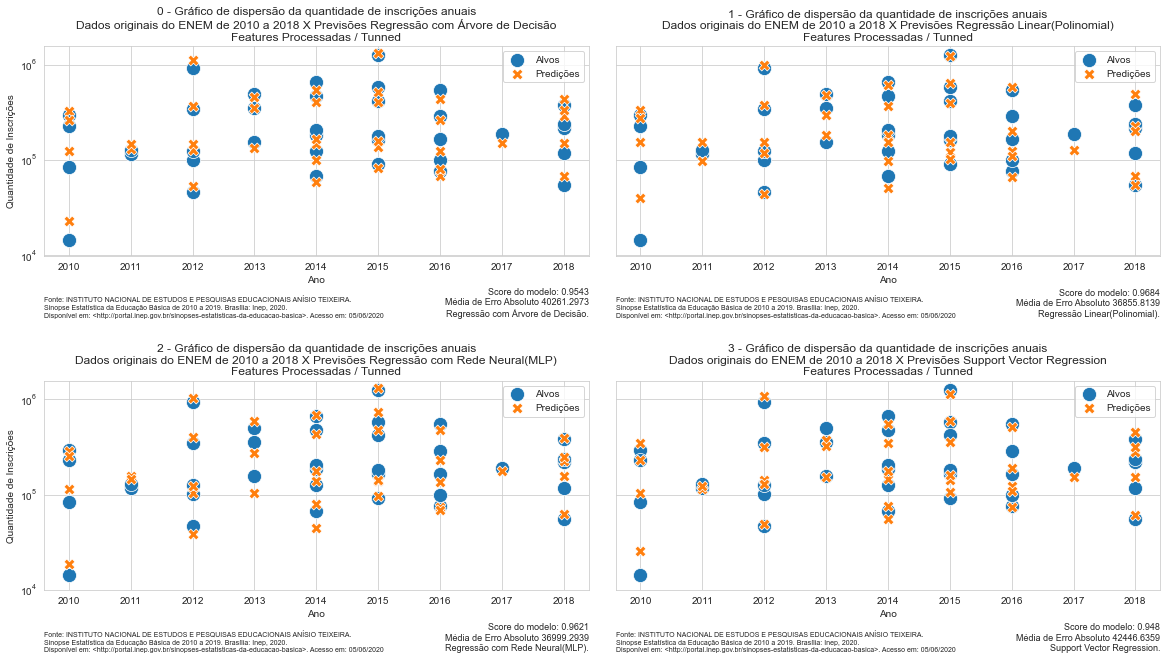

In [8]:
inscricao_uf.set_metrics(base=False, balanced=True, scaled=False)       # tunned model / balanced data

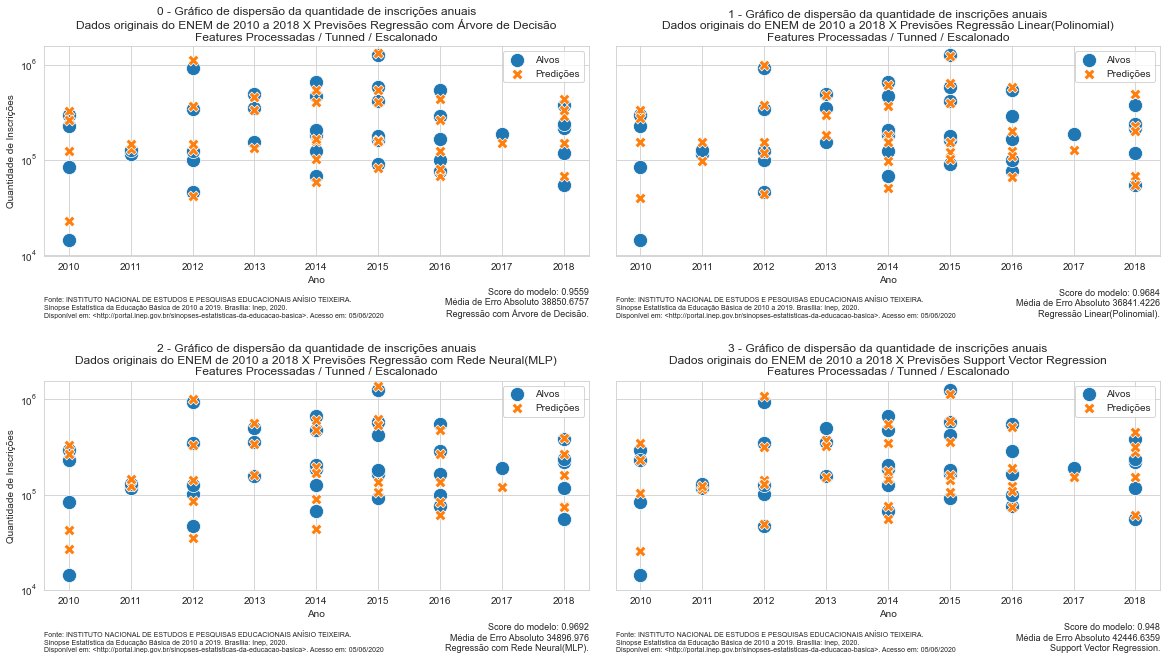

In [9]:
inscricao_uf.set_metrics(base=False, balanced=True, scaled=True)       # tunned model / balanced data / scaled data

C:\Users\TOP Artes\.conda\envs\proj\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


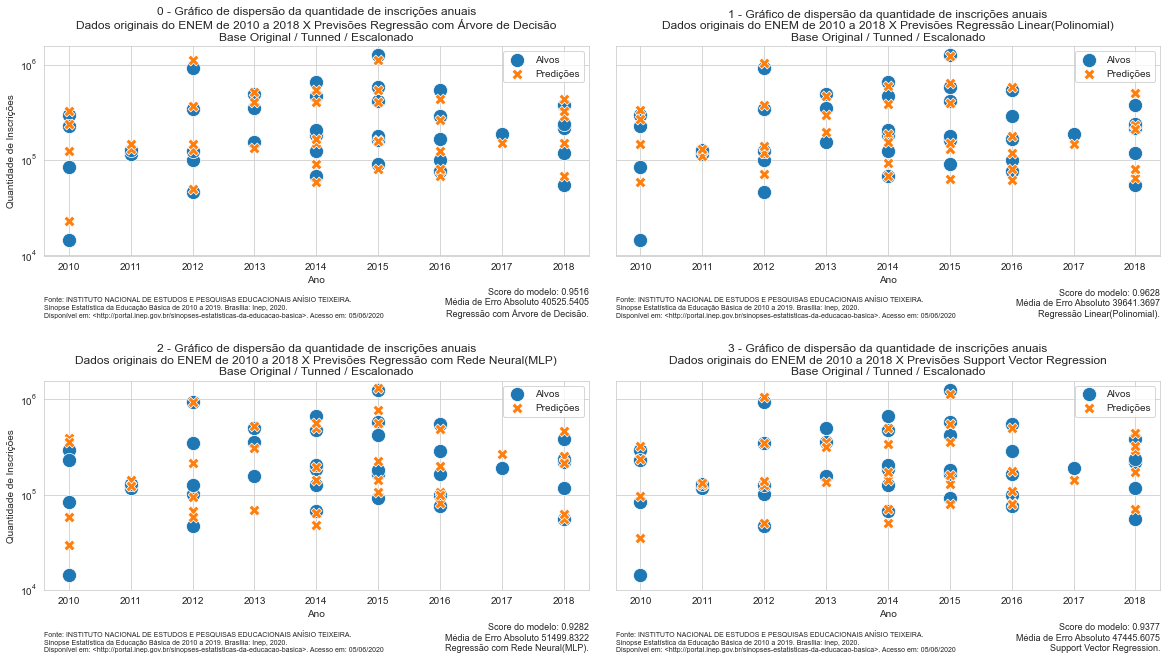

In [10]:
inscricao_uf.set_metrics(base=False, balanced=False, scaled=True)       # tunned model / balanced data / scaled data

C:\Users\TOP Artes\.conda\envs\proj\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


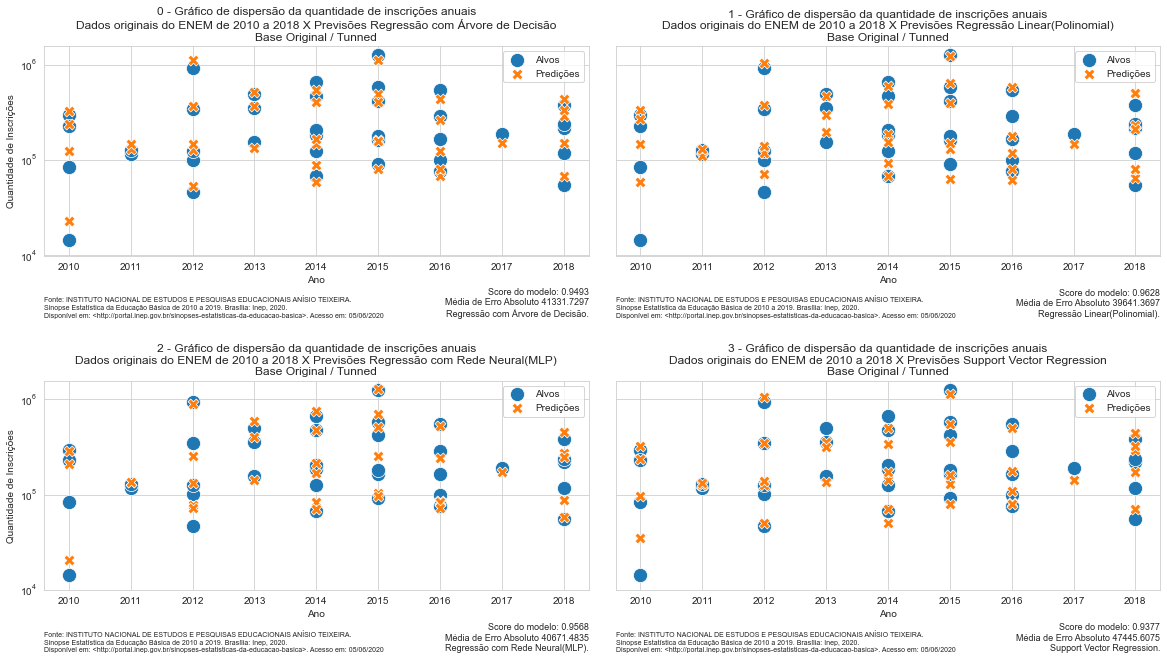

In [11]:
inscricao_uf.set_metrics(base=False, balanced=False, scaled=False)       # tunned model

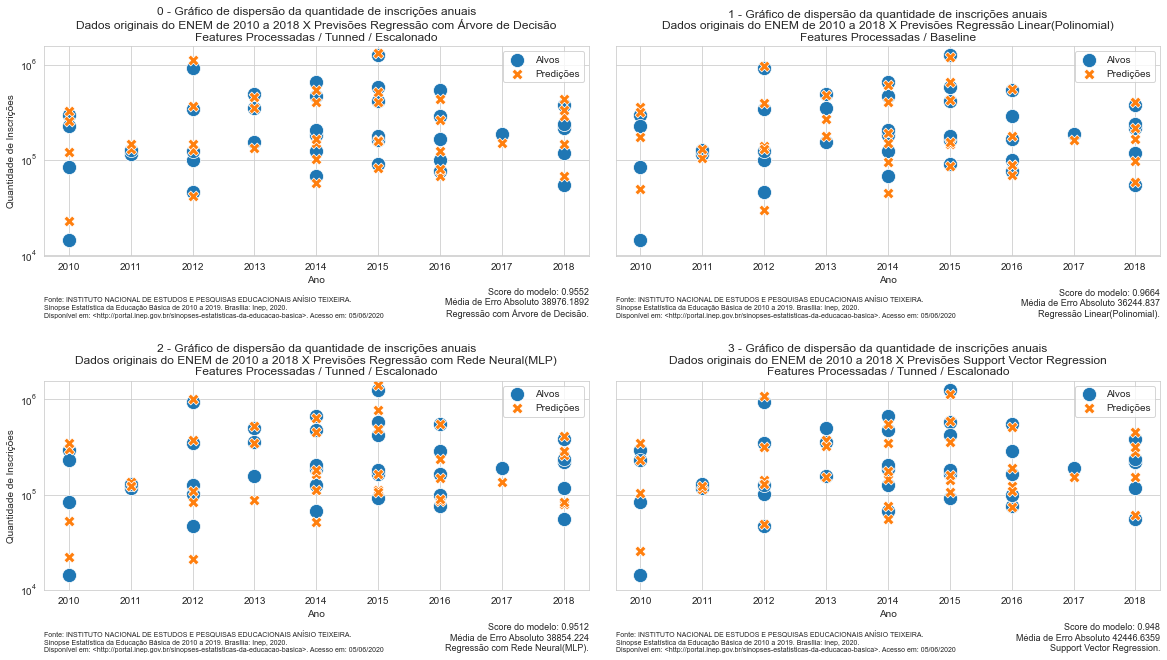

In [12]:
inscricao_uf.set_metrics(baseline = [1], scale = [0,2,3], balance = [0,1,2,3])            # Plota cada modelo com as configurações específicas

In [13]:
inscricao_uf.view_metrics()                                            # Cria o DataFrame com as métricas tiradas dos modelos
inscricao_uf.df_metrics[inscricao_uf.df_metrics.columns[range(10)]]    # Imprime os MAEs

,model,baseline(mae),baseline_sc(mae),balanced(mae),balanced_sc(mae),tunned(mae),tunned_sc(mae),balanced_tunned(mae),balanced_tunned_sc(mae),compare(mae)
0,arvore,42536.594595,40928.756757,42595.270270,41581.864865,41331.729730,40525.540541,40261.297297,38850.675676,38976.189189
1,linear_poly,39641.369685,39641.369685,36244.837048,42413.341451,39641.369685,39641.369685,36855.813932,36841.422601,36244.837048
2,rede_neural,57805.986683,66811.117718,50625.991162,55852.660356,40671.483516,51499.832239,36999.293885,34896.976002,38854.223997
3,support_vector,51607.195248,51607.195248,49271.129347,49271.129347,47445.607549,47445.607549,42446.635930,42446.635930,42446.635930


In [14]:
cols = ['model']+list(inscricao_uf.df_metrics.columns[range(10,19)])
inscricao_uf.df_metrics[cols]  # Imprime as Scores

,model,baseline(score),baseline_sc(score),balanced(score),balanced_sc(score),tunned(score),tunned_sc(score),balanced_tunned(score),balanced_tunned_sc(score),compare(score)
0,arvore,0.951590,0.953550,0.952379,0.954966,0.949304,0.951627,0.954345,0.955881,0.955177
1,linear_poly,0.962844,0.962844,0.966368,0.955284,0.962844,0.962844,0.968358,0.968374,0.966368
2,rede_neural,0.887765,0.865490,0.927900,0.918296,0.956842,0.928236,0.962084,0.969215,0.951226
3,support_vector,0.923483,0.923483,0.930522,0.930522,0.937688,0.937688,0.947963,0.947963,0.947963


C:\Users\TOP Artes\.conda\envs\proj\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\TOP Artes\.conda\envs\proj\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\TOP Artes\.conda\envs\proj\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (

C:\Users\TOP Artes\.conda\envs\proj\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\TOP Artes\.conda\envs\proj\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\TOP Artes\.conda\envs\proj\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (

C:\Users\TOP Artes\.conda\envs\proj\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\TOP Artes\.conda\envs\proj\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\TOP Artes\.conda\envs\proj\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (

C:\Users\TOP Artes\.conda\envs\proj\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\TOP Artes\.conda\envs\proj\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\TOP Artes\.conda\envs\proj\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (

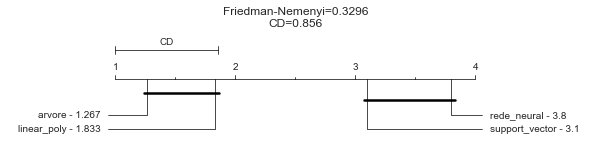

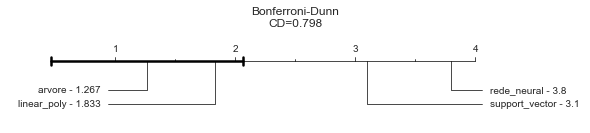

arvore average rank: 1.2666666666666666
linear_poly average rank: 1.8333333333333333
rede_neural average rank: 3.8
support_vector average rank: 3.1
De acordo com o resultado do 'Wilcoxon signed-rank' com o p-value = 0.0015.
Os modelos treinados:('arvore', 0.9254891556200041) e ('linear_poly', 0.9230962183450824) não são equivalentes.
Considerando o nível de significância de (α) = 0.05.

'The Wilcoxon signed-rank test was not designed to compare multiple random variables.
So, when comparing multiple classifiers, an 'intuitive' approach would be to apply the Wilcoxon test to all possible pairs.
However, when multiple tests are conducted, some of them will reject the null hypothesis only by chance (Demšar, 2006).
For the comparison of multiple classifiers, Demšar (2006) recommends the Friedman test.'


O teste de Friedman calculou o p-value = 0.3296.
Considerando o nível de significância de (α) = 0.05, os modelos são equivalentes.
Tendo em vista o Critical Distance (CD), somente os modelo

(array([[0.90173077, 0.92222513, 0.91901337, 0.91521727],
        [0.9183707 , 0.92370132, 0.9193163 , 0.91534447],
        [0.92883792, 0.92515698, 0.91995448, 0.91592383],
        [0.93465397, 0.92633692, 0.92047517, 0.91655664],
        [0.93459193, 0.926298  , 0.91083145, 0.91691528],
        [0.93627166, 0.92712604, 0.91165028, 0.91724922],
        [0.92840468, 0.9266057 , 0.91215717, 0.91669114],
        [0.92746876, 0.92663121, 0.91157264, 0.91685104],
        [0.93216909, 0.92802117, 0.91253231, 0.91710477],
        [0.92218143, 0.92596908, 0.90909446, 0.91650137],
        [0.92461659, 0.92445898, 0.90989819, 0.91699836],
        [0.92276596, 0.92481521, 0.9104389 , 0.91702619],
        [0.9225994 , 0.92230863, 0.91037196, 0.9170014 ],
        [0.92396546, 0.92232788, 0.91114145, 0.91697255],
        [0.92154867, 0.92221771, 0.91145403, 0.9168741 ],
        [0.92273946, 0.92133993, 0.91219368, 0.91707189],
        [0.92499818, 0.9220049 , 0.9120194 , 0.91729012],
        [0.927

In [15]:
inscricao_uf.set_metrics(validation=True, baseline = [1], scale = [0,2,3], balance = [0,1,2,3])            # Plota cada modelo com as configurações específicas